Kindly refer the **data-analysis** notebook for steps involved in data exploration, visualization, and preprocessing.

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [2]:
# Data preprocessing

# Import the data
diabetes_df = pd.read_csv('diabetes-dataset.csv', encoding='ISO-8859-1')

# Split the data into features and target
df_X = diabetes_df.drop('Outcome', axis=1)
df_Y = diabetes_df.Outcome

# Normalize the data
for column in df_X.columns:
    df_X[column] = df_X[column]/df_X[column].abs().max()
    
df_X.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407


In [3]:
# Split dataset into training and testing data

x_train, x_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = .2, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [4]:
# Instantiate a Random Forest Classifier model object and build the forest of trees

classifier = RandomForestClassifier(n_estimators=8, criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=8, random_state=0)

In [5]:
# Perform prediction on test data

y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

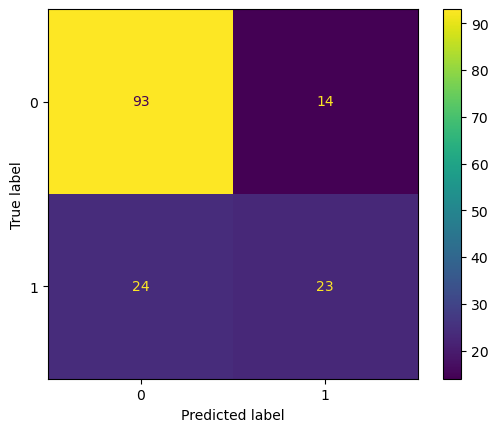

In [6]:
# Confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [7]:
# Classification report

clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       107
           1       0.62      0.49      0.55        47

    accuracy                           0.75       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154

